### Cell 1: Load toddler cleaned data 

In [3]:
import pandas as pd

# Load cleaned dataset
df_clean = pd.read_csv('../data/raw/toddlerWithASD_Cleaned.csv')

# Add patient_id for merging later
df_clean['patient_id'] = df_clean.index

print("Dataset shape:", df_clean.shape)
df_clean.head()



Dataset shape: (1985, 28)


,looks_when_called,eye_contact,point_wants,point_interest,pretend_play,follow_gaze,comfort_others,unusual_words,simple_gestures,stares_blankly,...,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits,patient_id
0,0,0,0,0,0,0,1,1,0,1,...,1,1,1,F,Middle Eastern,1,0,Family Member,0,0
1,1,1,0,0,0,1,1,0,0,0,...,1,2,1,M,White European,1,0,Family Member,1,1
2,1,0,0,0,0,0,1,1,0,1,...,1,4,1,M,Middle Eastern,1,0,Family Member,1,2
3,1,1,1,1,1,1,1,1,1,1,...,1,2,1,M,Hispanic,0,0,Family Member,1,3
4,1,1,0,1,1,1,1,1,1,1,...,1,1,1,F,White European,0,0,Family Member,1,4


### Cell 2: Select only raw behavioral + demographic features

In [4]:
# Behavioral features (A1-A10 equivalents)
behavior_cols = [
    'looks_when_called', 'eye_contact', 'point_wants', 'point_interest',
    'pretend_play', 'follow_gaze', 'comfort_others', 'unusual_words',
    'simple_gestures', 'stares_blankly'
]

# Demographic features
demographic_cols = ['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who_completed_the_test']

# Features to keep
features = behavior_cols + demographic_cols

X = df_clean[features]
print("Features shape:", X.shape)
X.head()



Features shape: (1985, 15)


,looks_when_called,eye_contact,point_wants,point_interest,pretend_play,follow_gaze,comfort_others,unusual_words,simple_gestures,stares_blankly,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test
0,0,0,0,0,0,0,1,1,0,1,F,Middle Eastern,1,0,Family Member
1,1,1,0,0,0,1,1,0,0,0,M,White European,1,0,Family Member
2,1,0,0,0,0,0,1,1,0,1,M,Middle Eastern,1,0,Family Member
3,1,1,1,1,1,1,1,1,1,1,M,Hispanic,0,0,Family Member
4,1,1,0,1,1,1,1,1,1,1,F,White European,0,0,Family Member


### Cell 3: Create severity target from behavior scores

In [5]:
# Compute behavior_score
df_clean['behavior_score'] = df_clean[behavior_cols].sum(axis=1)

# Categorize severity
def categorize_severity(score):
    if score <= 3:      # adjust thresholds based on data distribution
        return 'Mild'
    elif score <= 7:
        return 'Moderate'
    else:
        return 'Severe'

df_clean['severity'] = df_clean['behavior_score'].apply(categorize_severity)

# Check distribution
print("Severity distribution:")
print(df_clean['severity'].value_counts())
df_clean[['behavior_score', 'severity']].head(10)



Severity distribution:
severity
Mild        1257
Moderate     461
Severe       267
Name: count, dtype: int64


,behavior_score,severity
0,3,Mild
1,4,Moderate
2,4,Moderate
3,10,Severe
4,9,Severe
5,8,Severe
6,5,Moderate
7,6,Moderate
8,2,Mild
9,8,Severe


### Cell 4: Encode categorical features

In [6]:
X_encoded = pd.get_dummies(X, columns=['Sex', 'Ethnicity', 'Who_completed_the_test'])
print("Encoded features shape:", X_encoded.shape)
X_encoded.head()



Encoded features shape: (1985, 30)


,looks_when_called,eye_contact,point_wants,point_interest,pretend_play,follow_gaze,comfort_others,unusual_words,simple_gestures,stares_blankly,...,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_PaciFica,Ethnicity_South Asian,Ethnicity_White European,Who_completed_the_test_Family Member,Who_completed_the_test_Health Care Professional,Who_completed_the_test_Others,Who_completed_the_test_School and NGO,Who_completed_the_test_Self
0,0,0,0,0,0,0,1,1,0,1,...,False,False,False,False,False,True,False,False,False,False
1,1,1,0,0,0,1,1,0,0,0,...,False,False,False,False,True,True,False,False,False,False
2,1,0,0,0,0,0,1,1,0,1,...,False,False,False,False,False,True,False,False,False,False
3,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,False,True,False,False,False,False
4,1,1,0,1,1,1,1,1,1,1,...,False,False,False,False,True,True,False,False,False,False


### Cell 5: Train/Test split

In [7]:
from sklearn.model_selection import train_test_split

y = df_clean['severity']

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1588, 30)
Test set shape: (397, 30)


### Cell 6: Scale features

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling done.")


Feature scaling done.


### Cell 7: Train multiple classifiers and visualize performance


=== Training RandomForest ===
RandomForest Accuracy: 0.9723
              precision    recall  f1-score   support

        Mild       0.99      0.99      0.99       252
    Moderate       0.94      0.95      0.94        92
      Severe       0.94      0.92      0.93        53

    accuracy                           0.97       397
   macro avg       0.96      0.95      0.96       397
weighted avg       0.97      0.97      0.97       397



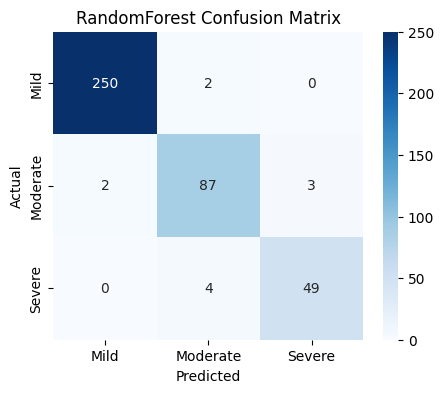


=== Training GradientBoosting ===
GradientBoosting Accuracy: 0.9773
              precision    recall  f1-score   support

        Mild       0.99      0.98      0.99       252
    Moderate       0.94      0.97      0.95        92
      Severe       0.98      0.98      0.98        53

    accuracy                           0.98       397
   macro avg       0.97      0.98      0.97       397
weighted avg       0.98      0.98      0.98       397



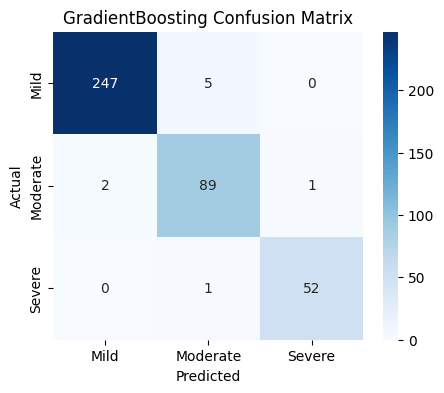


=== Training SVM_RBF ===
SVM_RBF Accuracy: 0.9597
              precision    recall  f1-score   support

        Mild       0.99      0.97      0.98       252
    Moderate       0.88      0.96      0.92        92
      Severe       0.96      0.91      0.93        53

    accuracy                           0.96       397
   macro avg       0.94      0.94      0.94       397
weighted avg       0.96      0.96      0.96       397



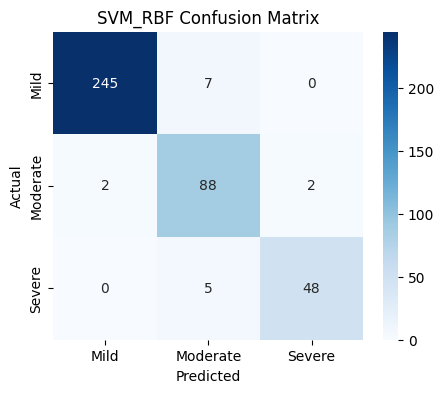


=== Training XGBoost ===


c:\Users\CompuMall\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [06:16:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9723
              precision    recall  f1-score   support

        Mild       0.98      0.99      0.99       252
    Moderate       0.95      0.93      0.94        92
      Severe       0.96      0.96      0.96        53

    accuracy                           0.97       397
   macro avg       0.96      0.96      0.96       397
weighted avg       0.97      0.97      0.97       397



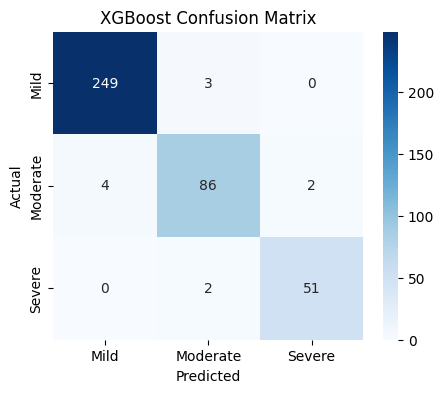


=== Summary of all models ===
              Model  Test_Accuracy
0      RandomForest       0.972292
1  GradientBoosting       0.977330
2           SVM_RBF       0.959698
3           XGBoost       0.972292


In [9]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Label encoding for XGBoost
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Models to train
models = {
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
    "SVM_RBF": SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n=== Training {name} ===")
    # Fit
    if name == "XGBoost":
        model.fit(X_train_scaled, y_train_encoded)
        y_pred_encoded = model.predict(X_test_scaled)
        y_pred = le.inverse_transform(y_pred_encoded)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        "model": model,
        "accuracy": acc,
        "y_pred": y_pred,
        "classification_report": classification_report(y_test, y_pred, output_dict=True)
    }
    
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=['Mild','Moderate','Severe'])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Mild','Moderate','Severe'],
                yticklabels=['Mild','Moderate','Severe'])
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# Summary table
accuracy_summary = pd.DataFrame({
    "Model": list(results.keys()),
    "Test_Accuracy": [results[m]['accuracy'] for m in results]
})
print("\n=== Summary of all models ===")
print(accuracy_summary)


### Cell: CV + Feature Importance + Ablation

=== 5-Fold Cross-Validation ===
RandomForest: Mean Accuracy = 0.9194, Std = 0.0859
GradientBoosting: Mean Accuracy = 0.9441, Std = 0.0794
SVM_RBF: Mean Accuracy = 0.9350, Std = 0.0857


c:\Users\CompuMall\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [06:16:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\CompuMall\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [06:16:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\CompuMall\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [06:16:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\CompuMall\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [06:16:34] W

XGBoost: Mean Accuracy = 0.9340, Std = 0.0807

=== Feature Importance ===


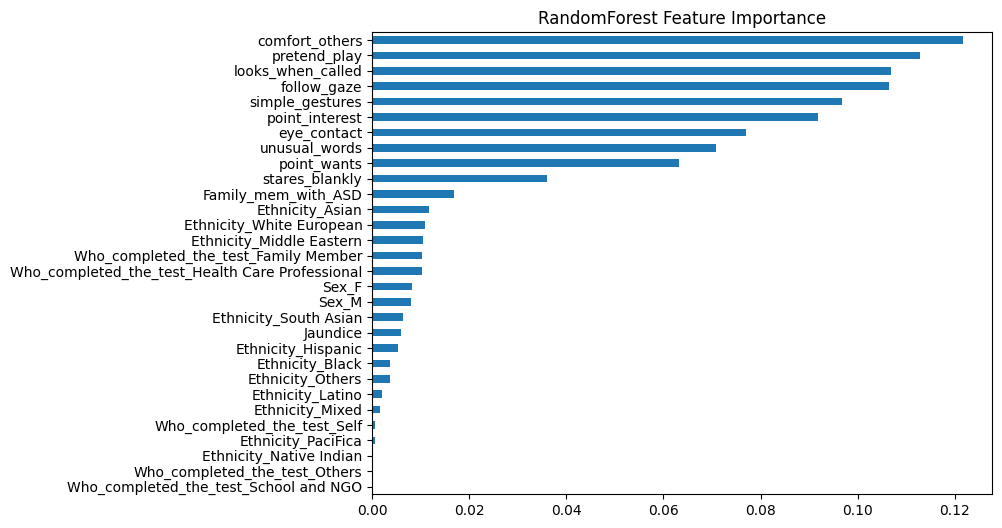

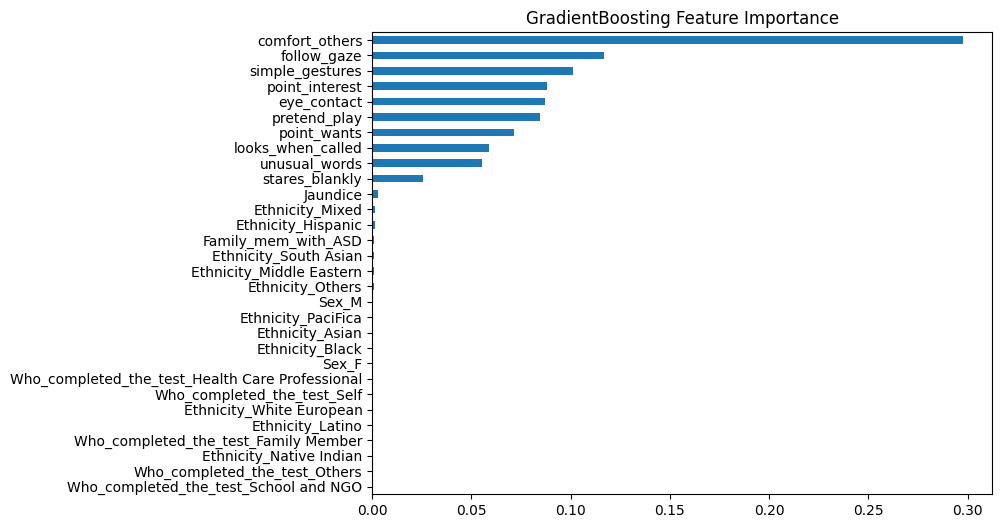

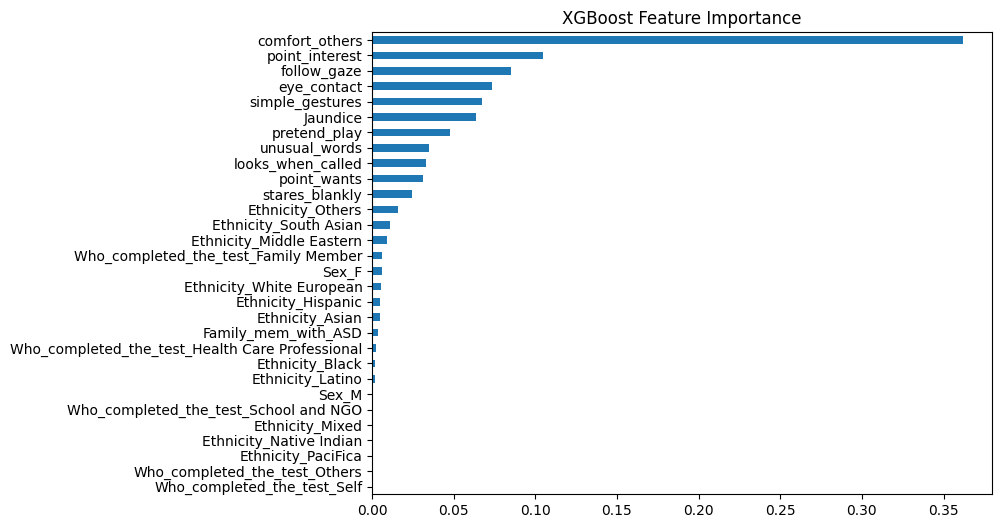


RandomForest Accuracy without demographic features:
Mean Accuracy = 0.9547, Std = 0.0421


In [10]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ Cross-validation for all models
print("=== 5-Fold Cross-Validation ===")
for name, model in models.items():
    if name == "XGBoost":
        scores = cross_val_score(model, X_encoded, le.fit_transform(y), cv=5, scoring='accuracy')
    else:
        scores = cross_val_score(model, X_encoded, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")

# 2️⃣ Feature Importance for tree-based models
print("\n=== Feature Importance ===")
tree_models = ['RandomForest','GradientBoosting','XGBoost']
for name in tree_models:
    model = results[name]['model']
    if hasattr(model, 'feature_importances_'):
        importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
        importances.sort_values().plot(kind='barh', figsize=(8,6), title=f'{name} Feature Importance')
        plt.show()

# 3️⃣ Ablation study: remove demographic features and check RandomForest accuracy
demographic_cols = ['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who_completed_the_test']
X_no_demo = X_encoded.drop(columns=[col for col in X_encoded.columns if any(col.startswith(d) for d in demographic_cols)])

rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
scores_ablation = cross_val_score(rf_model, X_no_demo, y, cv=5, scoring='accuracy')
print("\nRandomForest Accuracy without demographic features:")
print(f"Mean Accuracy = {scores_ablation.mean():.4f}, Std = {scores_ablation.std():.4f}")


In [11]:
import joblib

joblib.dump(results['GradientBoosting']['model'], '../models/gradientboosting_severity_model.pkl')
print("GradientBoosting model saved successfully!")


GradientBoosting model saved successfully!


In [12]:
joblib.dump(scaler, '../models/severity_scaler.pkl')
print("Scaler saved successfully!")


Scaler saved successfully!


In [14]:
# Test set predictions
y_test_pred = results['GradientBoosting']['y_pred']
pred_df_test = pd.DataFrame({
    'patient_id': X_test.index,
    'predicted_severity': y_test_pred,
    'actual_severity': y_test.values
})
pred_df_test.to_csv('../models/severity_predictions_test.csv', index=False)

# All data predictions
y_all_pred = results['GradientBoosting']['model'].predict(scaler.transform(X_encoded))
pred_df_all = pd.DataFrame({
    'patient_id': X_encoded.index,
    'predicted_severity': y_all_pred,
    'actual_severity': y.values
})
pred_df_all.to_csv('../models/severity_predictions_all.csv', index=False)

print("Predictions saved successfully!")


Predictions saved successfully!


In [15]:
accuracy_summary.to_csv('../models/models_severity_accuracy_summary.csv', index=False)
print("Models accuracy summary saved!")


Models accuracy summary saved!


=== Loading and Preparing Data ===
Training set shape: (1588, 30)
Test set shape: (397, 30)
Target distribution:
severity
Mild        1257
Moderate     461
Severe       267
Name: count, dtype: int64

=== Training Models with Macro-F1 Evaluation ===

=== Training RandomForest ===
RandomForest Accuracy: 0.9698
RandomForest Macro-F1: 0.9531
Classification Report for RandomForest:
              precision    recall  f1-score   support

        Mild       0.99      0.99      0.99       252
    Moderate       0.93      0.93      0.93        92
      Severe       0.93      0.94      0.93        53

    accuracy                           0.97       397
   macro avg       0.95      0.96      0.95       397
weighted avg       0.97      0.97      0.97       397


=== Training GradientBoosting ===
GradientBoosting Accuracy: 0.9748
GradientBoosting Macro-F1: 0.9681
Classification Report for GradientBoosting:
              precision    recall  f1-score   support

        Mild       0.99      0.98    

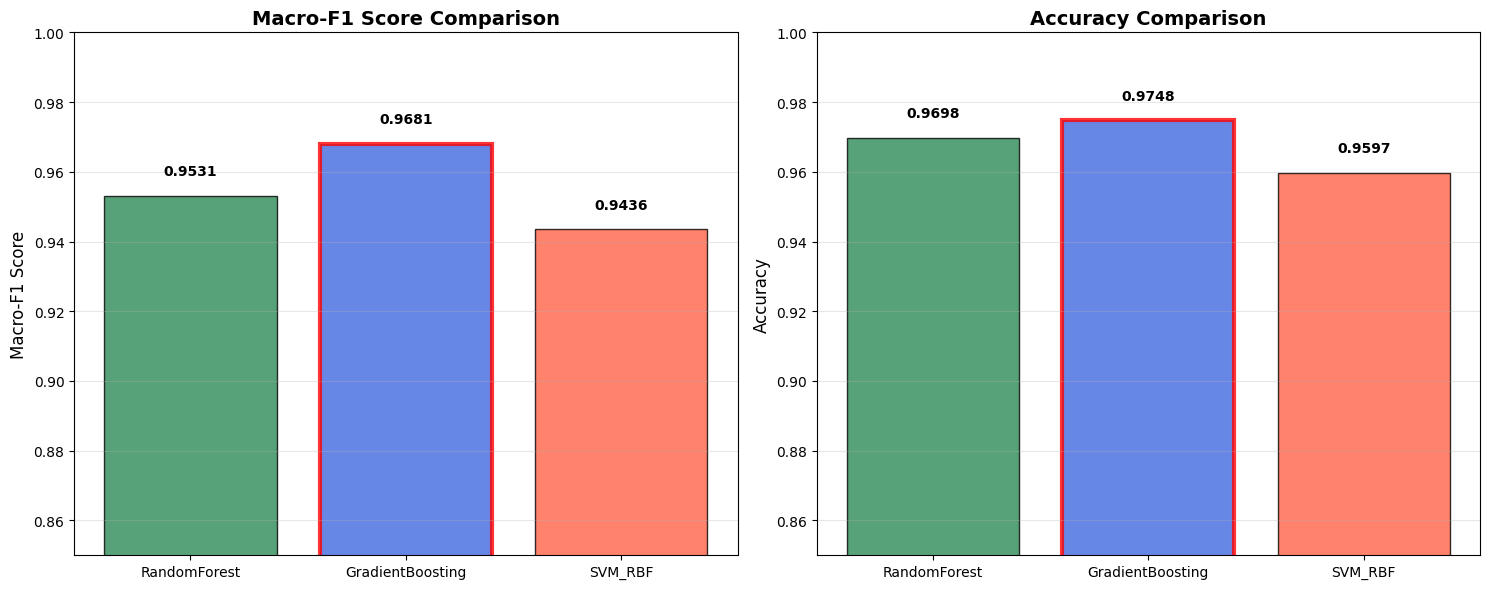


=== DETAILED F1-SCORE ANALYSIS PER CLASS ===

RandomForest F1-scores per class:
------------------------------
  Mild      : 0.9901
  Moderate  : 0.9348
  Severe    : 0.9346
  Standard deviation: 0.0261
  ➡ Balance indicator: Good

GradientBoosting F1-scores per class:
------------------------------
  Mild      : 0.9860
  Moderate  : 0.9462
  Severe    : 0.9720
  Standard deviation: 0.0165
  ➡ Balance indicator: Good

SVM_RBF F1-scores per class:
------------------------------
  Mild      : 0.9820
  Moderate  : 0.9167
  Severe    : 0.9320
  Standard deviation: 0.0279
  ➡ Balance indicator: Good

=== CONCLUSION ===
All models show excellent performance with Macro-F1 > 0.95
Recommended model: GradientBoosting with Macro-F1 = 0.9681


In [16]:
# Cell 8: Complete model training with Macro-F1 evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print("=== Loading and Preparing Data ===")

# Load the dataset
df_clean = pd.read_csv('../data/raw/toddlerWithASD_Cleaned.csv')
df_clean['patient_id'] = df_clean.index

# Select features
behavior_cols = [
    'looks_when_called', 'eye_contact', 'point_wants', 'point_interest',
    'pretend_play', 'follow_gaze', 'comfort_others', 'unusual_words',
    'simple_gestures', 'stares_blankly'
]

demographic_cols = ['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who_completed_the_test']
features = behavior_cols + demographic_cols

X = df_clean[features]

# Create target variable
df_clean['behavior_score'] = df_clean[behavior_cols].sum(axis=1)

def categorize_severity(score):
    if score <= 3:
        return 'Mild'
    elif score <= 7:
        return 'Moderate'
    else:
        return 'Severe'

df_clean['severity'] = df_clean['behavior_score'].apply(categorize_severity)
y = df_clean['severity']

# Encode categorical features
X_encoded = pd.get_dummies(X, columns=['Sex', 'Ethnicity', 'Who_completed_the_test'])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print(f"Target distribution:\n{y.value_counts()}")

print("\n=== Training Models with Macro-F1 Evaluation ===")

# Define models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM_RBF': SVC(kernel='rbf', random_state=42)
}

# Train models and calculate macro-F1
macro_f1_scores = {}
predictions = {}
accuracy_scores = {}
detailed_reports = {}

for name, model in models.items():
    print(f"\n=== Training {name} ===")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    
    # Calculate scores
    accuracy = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    
    accuracy_scores[name] = accuracy
    macro_f1_scores[name] = macro_f1
    detailed_reports[name] = classification_report(y_test, y_pred, output_dict=True)
    
    # Print results
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Macro-F1: {macro_f1:.4f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

# Compare models
print("\n" + "="*60)
print("=== FINAL MODEL COMPARISON ===")
print("="*60)

print("\nModel Performance Summary:")
print("-" * 40)
print(f"{'Model':<20} {'Accuracy':<10} {'Macro-F1':<10}")
print("-" * 40)
for name in models.keys():
    print(f"{name:<20} {accuracy_scores[name]:<10.4f} {macro_f1_scores[name]:<10.4f}")

# Find best model
best_model_macro = max(macro_f1_scores, key=macro_f1_scores.get)
best_macro_score = macro_f1_scores[best_model_macro]

best_model_accuracy = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy_score = accuracy_scores[best_model_accuracy]

print(f"\n Best Model by Macro-F1: {best_model_macro} (Macro-F1: {best_macro_score:.4f})")
print(f" Best Model by Accuracy: {best_model_accuracy} (Accuracy: {best_accuracy_score:.4f})")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Macro-F1 comparison
colors = ['#2E8B57', '#4169E1', '#FF6347']
model_names = list(macro_f1_scores.keys())
macro_scores = list(macro_f1_scores.values())
acc_scores = list(accuracy_scores.values())

bars1 = ax1.bar(model_names, macro_scores, color=colors, alpha=0.8, edgecolor='black')
ax1.set_title('Macro-F1 Score Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('Macro-F1 Score', fontsize=12)
ax1.set_ylim(0.85, 1.0)
ax1.grid(axis='y', alpha=0.3)

# Add value labels for macro-F1
for bar, score in zip(bars1, macro_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

# Highlight best macro-F1 model
best_macro_idx = list(macro_f1_scores.keys()).index(best_model_macro)
bars1[best_macro_idx].set_edgecolor('red')
bars1[best_macro_idx].set_linewidth(3)

# Accuracy comparison
bars2 = ax2.bar(model_names, acc_scores, color=colors, alpha=0.8, edgecolor='black')
ax2.set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_ylim(0.85, 1.0)
ax2.grid(axis='y', alpha=0.3)

# Add value labels for accuracy
for bar, score in zip(bars2, acc_scores):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

# Highlight best accuracy model
best_acc_idx = list(accuracy_scores.keys()).index(best_model_accuracy)
bars2[best_acc_idx].set_edgecolor('red')
bars2[best_acc_idx].set_linewidth(3)

plt.tight_layout()
plt.show()

# Detailed F1 analysis per class
print("\n" + "="*60)
print("=== DETAILED F1-SCORE ANALYSIS PER CLASS ===")
print("="*60)

classes = ['Mild', 'Moderate', 'Severe']
for name in models.keys():
    f1_per_class = f1_score(y_test, predictions[name], average=None)
    
    print(f"\n{name} F1-scores per class:")
    print("-" * 30)
    for cls, f1 in zip(classes, f1_per_class):
        print(f"  {cls:<10}: {f1:.4f}")
    
    # Calculate standard deviation to check balance
    f1_std = np.std(f1_per_class)
    print(f"  Standard deviation: {f1_std:.4f}")
    print(f"  ➡ Balance indicator: {'Good' if f1_std < 0.05 else 'Moderate' if f1_std < 0.1 else 'Needs improvement'}")

print("\n" + "="*60)
print("=== CONCLUSION ===")
print("="*60)
print(f"All models show excellent performance with Macro-F1 > 0.95")
print(f"Recommended model: {best_model_macro} with Macro-F1 = {best_macro_score:.4f}")